In [315]:
# Business questions
# To examine the relationship between annual financial information and share price for big 4 banks.
# To investigate whether the relationship persists in the volatile stock market. 
# Is there any relationship between ROE and Yearly share price? 
# Based on ASX 200 firms which made a loss and profit, 
# are there any correlation between price and financial ratios

In [ ]:
what is the portfolio mix that will outperform ASX200?
does the value investing persist in the volatile market? 
is the market efficient
identifying the companies based on value investing criteria.
is the value investing better than ASX200 index? 
graphs comparing between ASX200 and value investing criteria.
exclude some industry such as financial and utility and mining. 
which firms are those undervalue? in which industry?


In [ ]:
what is the correlation between price and earnings and balance sheet items
for those firm that made a loss and those that made a profit.
what are financial ratios that are positively related to the share price
loss vs profit making firms.


In [ ]:
dependent variable = returns based on annual share price

independent variables 

current ratio >= 1.5
earnings per share increasing past 5 years (greater than previous year)
pe ratio < 15
Current price should not be more than 15 times average earnings of the past three years. 
price per share / book value per share is < 1 (or 1.5)
PE * PB < 22.5
D/E < 0.5



In [210]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import xlrd

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [221]:
# Importing xls file
df1 = pd.read_excel('../Financial/finresults (1).xlsx')
df2 = pd.read_excel('../Financial/finresults (2).xlsx')
df3 = pd.read_excel('../Financial/finresults (3).xlsx')

In [212]:
df4 = pd.read_excel('../Financial/advanced.xlsx')

In [301]:
# ASX 200 lists as at June 2020
df5 = pd.read_csv('../Financial/20200601-asx200.csv', skiprows = 1)
df5 = df5[['Code','Company','Sector','Market Cap', 'Weight(%)']]

In [302]:
df5.head()

,Code,Company,Sector,Market Cap,Weight(%)
0,ABP,Abacus Property Group,Real Estate,"1,679,500,000",0.10
1,ABC,Adbri Ltd,Materials,"1,930,710,000",0.11
2,APT,Afterpay Ltd,Information Technology,"12,767,000,000",0.74
3,AGL,AGL Energy Ltd,Utilities,"10,537,700,000",0.61
4,ALQ,Als Ltd,Industrials,"3,401,100,000",0.20


In [267]:
# Making a copy
df1a = df1.copy()
df2a = df2.copy()
df3a = df3.copy()
df4a = df4.copy()
df5a = df5.copy()

# Balance sheet dataset

In [224]:
df1a.head()

,ASX Code,Company Name,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,14D,1414 Degrees Limited,Annual Cash Flow - Net Operating Cash Flow,,,,,,,,--,,-4134023,-2607214
1,14D,1414 Degrees Limited,Annual Balance Sheet - CA Cash,,,,,,,,28795000,,9721192,4395479
2,14D,1414 Degrees Limited,Annual Balance Sheet - CA Inventories,,,,,,,,0,,0,0
3,14D,1414 Degrees Limited,Annual Balance Sheet - Total Current Assets,,,,,,,,30163000,,12385751,5975166
4,14D,1414 Degrees Limited,Annual Balance Sheet - Total Assets,,,,,,,,32183000,,17630283,17213774


In [225]:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21690 entries, 0 to 21689
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ASX Code      21690 non-null  object
 1   Company Name  21690 non-null  object
 2   Item          21690 non-null  object
 3   2010          21690 non-null  object
 4   2011          21690 non-null  object
 5   2012          21690 non-null  object
 6   2013          21690 non-null  object
 7   2014          21690 non-null  object
 8   2015          21690 non-null  object
 9   2016          21690 non-null  object
 10  2017          21690 non-null  object
 11  2018          21690 non-null  object
 12  2019          21690 non-null  object
 13  2020          21690 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [226]:
df1a['Item'].unique()

array(['Annual Cash Flow - Net Operating Cash Flow',
       'Annual Balance Sheet - CA Cash',
       'Annual Balance Sheet - CA Inventories',
       'Annual Balance Sheet - Total Current Assets',
       'Annual Balance Sheet - Total Assets',
       'Annual Balance Sheet - Total Curr. Liabilities',
       'Annual Balance Sheet - Total Liabilities',
       'Annual Balance Sheet - CL Short-Term Debt',
       'Annual Balance Sheet - NCL Long-Term Debt',
       'Annual Balance Sheet - Total Equity'], dtype=object)

In [227]:
df1a['Item1'] = df1a['Item'].str.find('-', start=1)+2
df1a['Item1'] = df1a['Item1'].astype('int')
# df1a.info()

In [228]:
df1a["CF"] = df1a['Item'].str.contains("Annual Cash Flow")
df1a["CF"]

0         True
1        False
2        False
3        False
4        False
         ...  
21685    False
21686    False
21687    False
21688    False
21689    False
Name: CF, Length: 21690, dtype: bool

In [229]:
# df1a.Item.apply(lambda x: x[19:])
# df1a['Item'].loc[df1a['Item']=="Annual Balance Sheet - CA Cash"].apply(lambda x: x[23:])
df1a.head()

,ASX Code,Company Name,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Item1,CF
0,14D,1414 Degrees Limited,Annual Cash Flow - Net Operating Cash Flow,,,,,,,,--,,-4134023,-2607214,19,True
1,14D,1414 Degrees Limited,Annual Balance Sheet - CA Cash,,,,,,,,28795000,,9721192,4395479,23,False
2,14D,1414 Degrees Limited,Annual Balance Sheet - CA Inventories,,,,,,,,0,,0,0,23,False
3,14D,1414 Degrees Limited,Annual Balance Sheet - Total Current Assets,,,,,,,,30163000,,12385751,5975166,23,False
4,14D,1414 Degrees Limited,Annual Balance Sheet - Total Assets,,,,,,,,32183000,,17630283,17213774,23,False


In [230]:
# df1a['Item1'].groupby(df1a['Item']).mean()

In [231]:
word_count_cf = df1a.loc[df1a['Item']=='Annual Cash Flow - Net Operating Cash Flow', 'Item1'].mean()
word_count_bs = df1a.loc[df1a['Item']=='Annual Balance Sheet - CA Cash', 'Item1'].mean()

word_count_cf = int(word_count_cf)
word_count_bs = int(word_count_bs)

print(word_count_cf)
print(word_count_bs)

19
23


In [232]:
# renaming
df1a.loc[df1a['CF']==True,'Item'] = df1a.Item.str.slice(word_count_cf)
df1a.loc[df1a['CF']==False,'Item'] = df1a.Item.str.slice(word_count_bs)
    
df1a.head()

,ASX Code,Company Name,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Item1,CF
0,14D,1414 Degrees Limited,Net Operating Cash Flow,,,,,,,,--,,-4134023,-2607214,19,True
1,14D,1414 Degrees Limited,CA Cash,,,,,,,,28795000,,9721192,4395479,23,False
2,14D,1414 Degrees Limited,CA Inventories,,,,,,,,0,,0,0,23,False
3,14D,1414 Degrees Limited,Total Current Assets,,,,,,,,30163000,,12385751,5975166,23,False
4,14D,1414 Degrees Limited,Total Assets,,,,,,,,32183000,,17630283,17213774,23,False


In [233]:
df1a.Item.value_counts()

Total Equity               2169
NCL Long-Term Debt         2169
Net Operating Cash Flow    2169
Total Assets               2169
CL Short-Term Debt         2169
Total Liabilities          2169
CA Cash                    2169
Total Current Assets       2169
Total Curr. Liabilities    2169
CA Inventories             2169
Name: Item, dtype: int64

In [234]:
df1a.columns

Index(['ASX Code', 'Company Name', 'Item', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Item1', 'CF'],
      dtype='object')

In [235]:
# saving each file under different year
for i in range(2010,2021):
    locals()['df1a_{0}'.format(i)] = df1a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df1a_{0}'.format(i)]['year'] = i
    print('df1a_'+str(i))
#     df1a_[i] = df1a.pivot(index='ASX Code', columns='Item', values='i')


df1a_2010
df1a_2011
df1a_2012
df1a_2013
df1a_2014
df1a_2015
df1a_2016
df1a_2017
df1a_2018
df1a_2019
df1a_2020


In [236]:
# df1a_2010 = df1a.pivot(index='ASX Code', columns='Item', values='2011')
# df1a_2010['year'] = 2010
# df1a_2010.head()

In [237]:
# appending all the files
balance_sheet = df1a_2010.append([df1a_2011,
                                  df1a_2012,
                                  df1a_2013,
                                  df1a_2014,
                                  df1a_2015,
                                  df1a_2016,
                                  df1a_2017,
                                  df1a_2018,
                                  df1a_2019,
                                  df1a_2020])

In [238]:
balance_sheet.year.value_counts().sort_index()

2010    2169
2011    2169
2012    2169
2013    2169
2014    2169
2015    2169
2016    2169
2017    2169
2018    2169
2019    2169
2020    2169
Name: year, dtype: int64

In [239]:
balance_sheet.head()

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Net Operating Cash Flow,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year
ASX Code,,,,,,,,,,,
14D,,,,,,,,,,,2010
1AD,,,,,,,,,,,2010
1AG,271919,282857,1046419,59535,-417821,8940993,3922626,2336530,4958832,3982161,2010
1ST,,,,,,,,,,,2010
2BE,,,,,,,,,,,2010


# Profit & Loss Statement data

In [240]:
df2a.columns

Index(['ASX Code', 'Company Name', 'Item', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [241]:
df2a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ASX Code      13014 non-null  object
 1   Company Name  13014 non-null  object
 2   Item          13014 non-null  object
 3   2010          13014 non-null  object
 4   2011          13014 non-null  object
 5   2012          13014 non-null  object
 6   2013          13014 non-null  object
 7   2014          13014 non-null  object
 8   2015          13014 non-null  object
 9   2016          13014 non-null  object
 10  2017          13014 non-null  object
 11  2018          13014 non-null  object
 12  2019          13014 non-null  object
 13  2020          13014 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


In [242]:
df2a['Item'].unique()

array(['Annual Profit and Loss - Total Revenue Excluding Int',
       'Annual Profit and Loss - Operating Expenses',
       'Annual Profit and Loss - Net Profit after Tax Before',
       'Annual Profit and Loss - Reported NPAT After Abnorma',
       'Annual Profit and Loss - Shares Outstanding at Perio',
       'Annual Profit and Loss - Weighted Average Number of'],
      dtype=object)

In [243]:
word_count = df2a['Item'].str.find('-', start=1)+2

In [244]:
word_count.unique()

array([25])

In [245]:
# df2a['Item2'] = df2a['Item']

In [246]:
# df2a['Item2'] = df2a['Item2'].str[25:]

In [247]:
# df2a = df2a.drop(columns=['Item2'])

In [248]:
df2a['Item'] = df2a['Item'].str[25:]

In [249]:
df2a['Item'].unique()

array(['Total Revenue Excluding Int', 'Operating Expenses',
       'Net Profit after Tax Before', 'Reported NPAT After Abnorma',
       'Shares Outstanding at Perio', 'Weighted Average Number of'],
      dtype=object)

In [250]:
# This is similar to balance sheet data
# saving each file under different year
for i in range(2010,2021):
    locals()['df2a_{0}'.format(i)] = df2a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df2a_{0}'.format(i)]['year'] = i
    print('df2a_'+str(i))

df2a_2010
df2a_2011
df2a_2012
df2a_2013
df2a_2014
df2a_2015
df2a_2016
df2a_2017
df2a_2018
df2a_2019
df2a_2020


In [251]:
# appending all the files
income_statement = df2a_2010.append([df2a_2011,
                                  df2a_2012,
                                  df2a_2013,
                                  df2a_2014,
                                  df2a_2015,
                                  df2a_2016,
                                  df2a_2017,
                                  df2a_2018,
                                  df2a_2019,
                                  df2a_2020])

In [252]:
income_statement.year.value_counts().sort_index()

2010    2169
2011    2169
2012    2169
2013    2169
2014    2169
2015    2169
2016    2169
2017    2169
2018    2169
2019    2169
2020    2169
Name: year, dtype: int64

In [253]:
income_statement.head()

Item,Net Profit after Tax Before,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,year
ASX Code,,,,,,,
14D,,,,,,,2010
1AD,,,,,,,2010
1AG,317330,-12886912,317330,39697172,13271768,39741707,2010
1ST,,,,,,,2010
2BE,,,,,,,2010


# Cash flow and market data 

In [254]:
df3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ASX Code      10845 non-null  object
 1   Company Name  10845 non-null  object
 2   Item          10845 non-null  object
 3   2010          10845 non-null  object
 4   2011          10845 non-null  object
 5   2012          10845 non-null  object
 6   2013          10845 non-null  object
 7   2014          10845 non-null  object
 8   2015          10845 non-null  object
 9   2016          10845 non-null  object
 10  2017          10845 non-null  object
 11  2018          10845 non-null  object
 12  2019          10845 non-null  object
 13  2020          10845 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


In [255]:
df3a['Item'].unique()

array(['Annual Cash Flow - Net Operating Cash Flow',
       'Annual Cash Flow - Net Investing Cash Flow',
       'Annual Cash Flow - Net Financing Cash Flow',
       'Annual Ratio Analysis - Year End Share Price ($)',
       'Annual Ratio Analysis - Market Cap.($)'], dtype=object)

In [256]:
df3a['Item1'] = df3a['Item'].str.find('-', start=1)+2
df3a['Item1'] = df3a['Item1'].astype('int')
df3a['Item1'].unique()

array([19, 24])

In [257]:
df3a["CF"] = df3a['Item'].str.contains("Annual Cash Flow")
df3a["CF"]

0         True
1         True
2         True
3        False
4        False
         ...  
10840     True
10841     True
10842     True
10843    False
10844    False
Name: CF, Length: 10845, dtype: bool

In [258]:
word_count_cf = df3a.loc[df3a['Item']=='Annual Cash Flow - Net Operating Cash Flow', 'Item1'].mean()
word_count_mkt = df3a.loc[df3a['Item']=='Annual Ratio Analysis - Year End Share Price ($)', 'Item1'].mean()

word_count_cf = int(word_count_cf)
word_count_mkt = int(word_count_mkt)

print(word_count_cf)
print(word_count_mkt)

19
24


In [259]:
# renaming
df3a.loc[df3a['CF']==True,'Item'] = df3a.Item.str.slice(word_count_cf)
df3a.loc[df3a['CF']==False,'Item'] = df3a.Item.str.slice(word_count_mkt)
    
df3a.head()

,ASX Code,Company Name,Item,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Item1,CF
0,14D,1414 Degrees Limited,Net Operating Cash Flow,,,,,,,,--,,-4134023,-2607214,19,True
1,14D,1414 Degrees Limited,Net Investing Cash Flow,,,,,,,,--,,-3098750,-2335031,19,True
2,14D,1414 Degrees Limited,Net Financing Cash Flow,,,,,,,,0,,16022508,-398868,19,True
3,14D,1414 Degrees Limited,Year End Share Price ($),,,,,,,,--,,0.29,0.09,24,False
4,14D,1414 Degrees Limited,Market Cap.($),,,,,,,,0,,50855027.28,15734347.99,24,False


In [260]:
df3a.Item.value_counts()

Net Investing Cash Flow     2169
Net Financing Cash Flow     2169
Market Cap.($)              2169
Year End Share Price ($)    2169
Net Operating Cash Flow     2169
Name: Item, dtype: int64

In [261]:
df3a.columns

Index(['ASX Code', 'Company Name', 'Item', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Item1', 'CF'],
      dtype='object')

In [262]:
# saving each file under different year
for i in range(2010,2021):
    locals()['df3a_{0}'.format(i)] = df3a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df3a_{0}'.format(i)]['year'] = i
    print('df3a_'+str(i))
#     df1a_[i] = df1a.pivot(index='ASX Code', columns='Item', values='i')


df3a_2010
df3a_2011
df3a_2012
df3a_2013
df3a_2014
df3a_2015
df3a_2016
df3a_2017
df3a_2018
df3a_2019
df3a_2020


In [263]:
# appending all the files
cash_flow = df3a_2010.append([df3a_2011,
                              df3a_2012,
                              df3a_2013,
                              df3a_2014,
                              df3a_2015,
                              df3a_2016,
                              df3a_2017,
                              df3a_2018,
                              df3a_2019,
                              df3a_2020])

In [264]:
cash_flow.year.value_counts().sort_index()

2010    2169
2011    2169
2012    2169
2013    2169
2014    2169
2015    2169
2016    2169
2017    2169
2018    2169
2019    2169
2020    2169
Name: year, dtype: int64

In [265]:
cash_flow.head()

Item,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow,Year End Share Price ($),year
ASX Code,,,,,,
14D,,,,,,2010
1AD,,,,,,2010
1AG,3453653.96,1206807,-3371176,-417821,0.09,2010
1ST,,,,,,2010
2BE,,,,,,2010


# Merging data

In [268]:
#data sets are
balance_sheet.head(2)

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Net Operating Cash Flow,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year
ASX Code,,,,,,,,,,,
14D,,,,,,,,,,,2010
1AD,,,,,,,,,,,2010


In [269]:
income_statement.head(2)

Item,Net Profit after Tax Before,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,year
ASX Code,,,,,,,
14D,,,,,,,2010
1AD,,,,,,,2010


In [270]:
cash_flow.head(2)

Item,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow,Year End Share Price ($),year
ASX Code,,,,,,
14D,,,,,,2010
1AD,,,,,,2010


In [271]:
balance_sheet.columns

Index(['CA Cash', 'CA Inventories', 'CL Short-Term Debt', 'NCL Long-Term Debt',
       'Net Operating Cash Flow', 'Total Assets', 'Total Curr. Liabilities',
       'Total Current Assets', 'Total Equity', 'Total Liabilities', 'year'],
      dtype='object', name='Item')

In [285]:
# merging
financial = balance_sheet.merge(income_statement, how='left', on=['ASX Code','year'])
financial = financial.merge(cash_flow, how='left', on=['ASX Code','year'])
financial.head()

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Net Operating Cash Flow_x,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,...,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow_y,Year End Share Price ($)
ASX Code,,,,,,,,,,,,,,,,,,,,,
14D,,,,,,,,,,,...,,,,,,,,,,
1AD,,,,,,,,,,,...,,,,,,,,,,
1AG,271919,282857,1046419,59535,-417821,8940993,3922626,2336530,4958832,3982161,...,-12886912,317330,39697172,13271768,39741707,3453653.96,1206807,-3371176,-417821,0.09
1ST,,,,,,,,,,,...,,,,,,,,,,
2BE,,,,,,,,,,,...,,,,,,,,,,


In [286]:
financial.columns

Index(['CA Cash', 'CA Inventories', 'CL Short-Term Debt', 'NCL Long-Term Debt',
       'Net Operating Cash Flow_x', 'Total Assets', 'Total Curr. Liabilities',
       'Total Current Assets', 'Total Equity', 'Total Liabilities', 'year',
       'Net Profit after Tax Before', 'Operating Expenses',
       'Reported NPAT After Abnorma', 'Shares Outstanding at Perio',
       'Total Revenue Excluding Int', 'Weighted Average Number of',
       'Market Cap.($)', 'Net Financing Cash Flow', 'Net Investing Cash Flow',
       'Net Operating Cash Flow_y', 'Year End Share Price ($)'],
      dtype='object', name='Item')

In [287]:
financial_asx200 = financial.merge(df5a, left_on='ASX Code', right_on='Code', 
                            validate="m:1")

In [288]:
financial_asx200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2177
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CA Cash                      2178 non-null   object
 1   CA Inventories               2178 non-null   object
 2   CL Short-Term Debt           2178 non-null   object
 3   NCL Long-Term Debt           2178 non-null   object
 4   Net Operating Cash Flow_x    2178 non-null   object
 5   Total Assets                 2178 non-null   object
 6   Total Curr. Liabilities      2178 non-null   object
 7   Total Current Assets         2178 non-null   object
 8   Total Equity                 2178 non-null   object
 9   Total Liabilities            2178 non-null   object
 10  year                         2178 non-null   int64 
 11  Net Profit after Tax Before  2178 non-null   object
 12  Operating Expenses           2178 non-null   object
 13  Reported NPAT After Abnorma  2178

In [296]:
financial_asx200['Code'].unique()

array(['A2M', 'ABC', 'ABP', 'AGL', 'ALL', 'ALQ', 'ALU', 'ALX', 'AMC',
       'AMP', 'ANN', 'ANZ', 'APA', 'APE', 'APT', 'APX', 'ARB', 'ASB',
       'AST', 'ASX', 'AVH', 'AWC', 'AZJ', 'BAP', 'BEN', 'BGA', 'BHP',
       'BIN', 'BKL', 'BKW', 'BLD', 'BOQ', 'BPT', 'BRG', 'BSL', 'BVS',
       'BWP', 'BXB', 'CAR', 'CBA', 'CCL', 'CCP', 'CGC', 'CGF', 'CHC',
       'CIM', 'CKF', 'CLW', 'CMW', 'CNU', 'COE', 'COH', 'COL', 'CPU',
       'CQR', 'CSL', 'CSR', 'CTD', 'CUV', 'CWN', 'CWY', 'DHG', 'DMP',
       'DOW', 'DXS', 'EHE', 'ELD', 'EML', 'EVN', 'FBU', 'FLT', 'FMG',
       'FPH', 'GEM', 'GMG', 'GNC', 'GOR', 'GOZ', 'GPT', 'GUD', 'GWA',
       'HLS', 'HUB', 'HVN', 'IAG', 'IEL', 'IFL', 'IGO', 'ILU', 'INA',
       'ING', 'IPH', 'IPL', 'IRE', 'IVC', 'JBH', 'JHG', 'JHX', 'JIN',
       'LLC', 'LNK', 'LYC', 'MFG', 'MGR', 'MIN', 'MMS', 'MND', 'MPL',
       'MQG', 'MTS', 'MYX', 'NAB', 'NAN', 'NCM', 'NEA', 'NEC', 'NHC',
       'NHF', 'NSR', 'NST', 'NUF', 'NWH', 'NWL', 'NWS', 'NXT', 'OML',
       'ORA', 'ORE',

# Data cleaning

In [53]:
financial.head(2)

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Net Operating Cash Flow_x,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,...,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow_y,Year End Share Price ($)
ASX Code,,,,,,,,,,,,,,,,,,,,,
14D,,,,,,,,,,,...,,,,,,,,,,
1AD,,,,,,,,,,,...,,,,,,,,,,


In [54]:
financial.columns

Index(['CA Cash', 'CA Inventories', 'CL Short-Term Debt', 'NCL Long-Term Debt',
       'Net Operating Cash Flow_x', 'Total Assets', 'Total Curr. Liabilities',
       'Total Current Assets', 'Total Equity', 'Total Liabilities', 'year',
       'Net Profit after Tax Before', 'Operating Expenses',
       'Reported NPAT After Abnorma', 'Shares Outstanding at Perio',
       'Total Revenue Excluding Int', 'Weighted Average Number of',
       'Market Cap.($)', 'Net Financing Cash Flow', 'Net Investing Cash Flow',
       'Net Operating Cash Flow_y', 'Year End Share Price ($)'],
      dtype='object', name='Item')

In [55]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23859 entries, 14D to ZYUS
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CA Cash                      23859 non-null  object
 1   CA Inventories               23859 non-null  object
 2   CL Short-Term Debt           23859 non-null  object
 3   NCL Long-Term Debt           23859 non-null  object
 4   Net Operating Cash Flow_x    23859 non-null  object
 5   Total Assets                 23859 non-null  object
 6   Total Curr. Liabilities      23859 non-null  object
 7   Total Current Assets         23859 non-null  object
 8   Total Equity                 23859 non-null  object
 9   Total Liabilities            23859 non-null  object
 10  year                         23859 non-null  int64 
 11  Net Profit after Tax Before  23859 non-null  object
 12  Operating Expenses           23859 non-null  object
 13  Reported NPAT After Abnorma  23859 

# Dealing with dtype and missing values

In [56]:
# converting all columns to float
for columns in financial:
    financial[columns] = pd.to_numeric(financial[columns], errors='coerce', downcast='float')

In [57]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23859 entries, 14D to ZYUS
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CA Cash                      18111 non-null  float32
 1   CA Inventories               15251 non-null  float32
 2   CL Short-Term Debt           15309 non-null  float32
 3   NCL Long-Term Debt           11608 non-null  float32
 4   Net Operating Cash Flow_x    17442 non-null  float32
 5   Total Assets                 18221 non-null  float32
 6   Total Curr. Liabilities      18005 non-null  float32
 7   Total Current Assets         18119 non-null  float32
 8   Total Equity                 18108 non-null  float32
 9   Total Liabilities            18147 non-null  float32
 10  year                         23859 non-null  float32
 11  Net Profit after Tax Before  18254 non-null  float32
 12  Operating Expenses           14653 non-null  float32
 13  Reported NPAT After 

In [58]:
financial.describe()

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Net Operating Cash Flow_x,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,...,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow_y,Year End Share Price ($)
count,1.811100e+04,1.525100e+04,1.530900e+04,1.160800e+04,1.744200e+04,1.822100e+04,1.800500e+04,1.811900e+04,1.810800e+04,1.814700e+04,...,1.465300e+04,1.825400e+04,1.824500e+04,1.275200e+04,1.824500e+04,1.824900e+04,1.824800e+04,1.569100e+04,1.744000e+04,17530.000000
mean,7.497133e+07,4.372224e+07,1.119592e+08,3.513491e+08,1.041165e+08,3.451183e+09,2.727123e+08,3.077421e+08,8.654507e+08,2.601554e+09,...,-4.261177e+08,8.292649e+07,5.140247e+08,6.177572e+08,4.574308e+08,1.821242e+09,-1.831064e+07,-8.010092e+07,1.041916e+08,4.154193
std,6.304915e+08,3.098298e+08,2.077270e+09,2.437895e+09,1.233999e+09,4.229226e+10,3.277550e+09,3.174302e+09,1.021292e+10,3.841348e+10,...,2.789733e+09,1.838357e+09,1.364795e+09,3.856390e+09,1.123397e+09,1.620643e+10,8.320131e+08,8.184730e+08,1.234093e+09,17.778593
min,-1.148500e+07,0.000000e+00,-1.470000e+07,-3.043600e+07,-1.309000e+10,0.000000e+00,-2.798000e+08,0.000000e+00,-9.805860e+08,-2.941000e+08,...,-6.313000e+10,-8.677771e+09,0.000000e+00,-6.316401e+07,0.000000e+00,0.000000e+00,-3.223200e+10,-3.425800e+10,-1.309000e+10,0.000000
25%,9.058570e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.200148e+06,6.481387e+06,4.558030e+05,1.846916e+06,4.646835e+06,5.856810e+05,...,-5.786300e+07,-3.790504e+06,9.273900e+07,2.176392e+05,7.856000e+07,6.350234e+06,-2.843242e+05,-9.823396e+06,-2.198024e+06,0.030000
50%,3.495899e+06,0.000000e+00,0.000000e+00,2.881950e+05,-5.492025e+05,2.478387e+07,2.362582e+06,6.874000e+06,1.728392e+07,3.791202e+06,...,-7.011000e+06,-7.987125e+05,2.082018e+08,4.003427e+06,1.857370e+08,2.598462e+07,6.166445e+05,-1.228146e+06,-5.478435e+05,0.170000
75%,1.588263e+07,1.550277e+06,1.656000e+06,3.098400e+07,6.053250e+06,1.783680e+08,2.264367e+07,4.612750e+07,1.083686e+08,4.859350e+07,...,-2.024125e+06,4.101864e+06,5.142805e+08,9.891266e+07,4.644955e+08,1.547034e+08,5.106321e+06,-5.975900e+04,6.153740e+06,1.310000
max,2.870500e+10,6.530000e+09,6.838000e+10,8.906300e+10,5.865100e+10,1.042286e+12,1.447210e+11,1.279160e+11,8.976239e+11,9.809890e+11,...,9.481439e+08,2.101043e+11,7.703490e+10,7.557736e+10,6.791161e+10,4.726875e+11,4.480900e+10,8.148000e+09,5.865100e+10,465.100006


In [59]:
# functions to change missing value to zero or nan
def missing_to_zero(data, column):
    missing = data[column].isna()
    data.loc[missing, column] = 0

In [60]:
financial.isna().sum()

Item
CA Cash                         5748
CA Inventories                  8608
CL Short-Term Debt              8550
NCL Long-Term Debt             12251
Net Operating Cash Flow_x       6417
Total Assets                    5638
Total Curr. Liabilities         5854
Total Current Assets            5740
Total Equity                    5751
Total Liabilities               5712
year                               0
Net Profit after Tax Before     5605
Operating Expenses              9206
Reported NPAT After Abnorma     5605
Shares Outstanding at Perio     5614
Total Revenue Excluding Int    11107
Weighted Average Number of      5614
Market Cap.($)                  5610
Net Financing Cash Flow         5611
Net Investing Cash Flow         8168
Net Operating Cash Flow_y       6419
Year End Share Price ($)        6329
dtype: int64

In [61]:
financial = financial.drop(columns=['Net Operating Cash Flow_x'])

In [62]:
financial.rename(columns={'Net Operating Cash Flow_y':'Net Operating Cash Flow'}, inplace=True)

In [63]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23859 entries, 14D to ZYUS
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CA Cash                      18111 non-null  float32
 1   CA Inventories               15251 non-null  float32
 2   CL Short-Term Debt           15309 non-null  float32
 3   NCL Long-Term Debt           11608 non-null  float32
 4   Total Assets                 18221 non-null  float32
 5   Total Curr. Liabilities      18005 non-null  float32
 6   Total Current Assets         18119 non-null  float32
 7   Total Equity                 18108 non-null  float32
 8   Total Liabilities            18147 non-null  float32
 9   year                         23859 non-null  float32
 10  Net Profit after Tax Before  18254 non-null  float32
 11  Operating Expenses           14653 non-null  float32
 12  Reported NPAT After Abnorma  18254 non-null  float32
 13  Shares Outstanding a

In [64]:
financial1 = financial[['Total Assets','Total Curr. Liabilities','Total Current Assets','Total Equity',
                        'Total Liabilities','year','Reported NPAT After Abnorma','Weighted Average Number of',
                       'Year End Share Price ($)', 'Market Cap.($)']]

In [65]:
# only going to keep with positive equity value
financial1 = financial1.loc[financial1['Total Equity']>1]

In [66]:
# replacing to np.NaN if value is zero or negative for 
# Total Curr. Liabilities, Total Current Assets, Total Liabilities, 
# Weighted Average Number of, Year End Share Price ($)
financial1['Total Liabilities'].loc[financial1['Total Liabilities']<1] = np.NaN
financial1['Total Curr. Liabilities'].loc[financial1['Total Curr. Liabilities']<1] = np.NaN
financial1['Total Current Assets'].loc[financial1['Total Current Assets']<1] = np.NaN
financial1['Weighted Average Number of'].loc[financial1['Weighted Average Number of']<1] = np.NaN
financial1['Year End Share Price ($)'].loc[financial1['Year End Share Price ($)']==0] = np.NaN




In [67]:
# Replacing those value 

In [68]:
financial1.loc[financial1['Market Cap.($)']<1]

Item,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($)
ASX Code,,,,,,,,,,
4DS,6.738505e+06,NaN,4.916505e+06,6.738505e+06,NaN,2010.0,-124800.0,NaN,NaN,0.0
AAJ,4.830740e+06,60794.0,4.580795e+06,4.769946e+06,60794.0,2010.0,0.0,NaN,NaN,0.0
ACP,3.473894e+06,10405.0,3.222263e+06,3.463489e+06,10405.0,2010.0,0.0,NaN,NaN,0.0
AEB,7.140816e+06,300000.0,7.138069e+06,6.840816e+06,300000.0,2010.0,-3728758.0,NaN,NaN,0.0
AFW,3.415586e+06,NaN,2.700467e+06,3.415586e+06,NaN,2010.0,-534936.0,31650000.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
UNI,1.943000e+08,38800000.0,2.760000e+07,8.540000e+07,108900000.0,2020.0,0.0,NaN,NaN,0.0
WAK,3.043735e+07,6696353.0,2.483732e+07,6.030758e+06,24406596.0,2020.0,0.0,NaN,NaN,0.0
WSR,5.756134e+09,9829000.0,5.203251e+09,5.746305e+09,9829000.0,2020.0,0.0,NaN,NaN,0.0


In [69]:
financial1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17166 entries, 1AG to ZYUS
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Assets                 17166 non-null  float32
 1   Total Curr. Liabilities      16946 non-null  float32
 2   Total Current Assets         17018 non-null  float32
 3   Total Equity                 17166 non-null  float32
 4   Total Liabilities            17080 non-null  float32
 5   year                         17166 non-null  float32
 6   Reported NPAT After Abnorma  17166 non-null  float32
 7   Weighted Average Number of   16505 non-null  float32
 8   Year End Share Price ($)     15745 non-null  float32
 9   Market Cap.($)               17166 non-null  float32
dtypes: float32(10)
memory usage: 804.7+ KB


In [70]:
# merging is done after cleaning the financial data

In [71]:
# merging company details
financial1 = financial1.merge(df4a, how='left', on=['ASX Code'])
financial1.head()

,ASX Code,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),Company Name,Status,GICS Sector,GICS Industry Group,GICS Industry
0,1AG,8940993.0,3922626.0,2336530.0,4958832.0,3982161.0,2010.0,317330.0,39741708.0,0.09,3453654.00,Alterra Limited,Trading,Industrials,Commercial & Professional Services,Commercial Services & Supplies
1,3DP,1717388.0,30750.0,1467388.0,1686638.0,30750.0,2010.0,5524380.0,91474528.0,0.01,3679128.75,Pointerra Limited,Trading,Information Technology,Software & Services,Software
2,4CE,3378904.0,128776.0,3205770.0,3250128.0,128776.0,2010.0,-457946.0,18333332.0,0.21,15050000.00,Force Commodities Limited,Trading,Materials,Materials,Metals & Mining
3,4DS,6738505.0,NaN,4916505.0,6738505.0,NaN,2010.0,-124800.0,NaN,NaN,0.00,4DS Memory Limited,Trading,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment
4,88E,3788450.0,214519.0,2218354.0,3573931.0,214519.0,2010.0,-1731782.0,64559084.0,0.25,20482148.00,88 Energy Limited,Trading,Energy,Energy,"Oil, Gas & Consumable Fuels"


In [72]:
financial1 = financial1.set_index(['ASX Code'])

# Calculating ratios

In [73]:
financial1.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Assets,17166.0,3.656867e+09,4.356663e+10,1.439000e+03,7510308.00,2.836742e+07,1.984020e+08,1.042286e+12
Total Curr. Liabilities,16946.0,2.885506e+08,3.377783e+09,2.020000e+02,446166.50,2.417152e+06,2.467788e+07,1.447210e+11
Total Current Assets,17018.0,3.265585e+08,3.274597e+09,5.530000e+02,2197327.25,7.928539e+06,5.204240e+07,1.279160e+11
Total Equity,17166.0,9.137147e+08,1.048739e+10,3.130000e+02,5761510.75,2.027021e+07,1.239338e+08,8.976239e+11
Total Liabilities,17080.0,2.756902e+09,3.958780e+10,2.020000e+02,559668.25,3.781752e+06,5.283475e+07,9.809890e+11
year,17166.0,2.015459e+03,3.113908e+00,2.010000e+03,2013.00,2.016000e+03,2.018000e+03,2.020000e+03
Reported NPAT After Abnorma,17166.0,8.843349e+07,1.895479e+09,-8.677771e+09,-3711057.75,-7.642670e+05,5.147665e+06,2.101043e+11
Weighted Average Number of,16505.0,4.733525e+08,1.133318e+09,1.999000e+03,90338576.00,1.983020e+08,4.832890e+08,6.791161e+10
Year End Share Price ($),15745.0,4.380467e+00,1.836966e+01,1.000000e-02,0.05,2.100000e-01,1.570000e+00,4.651000e+02
Market Cap.($),17166.0,1.892076e+09,1.636611e+10,0.000000e+00,7184598.00,2.924352e+07,1.734780e+08,4.726875e+11


In [74]:
# Profitability ratios
# need to work on it more to use average assets and equity
# financial1['PM_before_ab'] = financial1['Net Profit after Tax Before']/financial1['Total Revenue Excluding Int']
# financial1['PM_after_ab'] = financial1['Reported NPAT After Abnorma']/financial1['Total Revenue Excluding Int']
financial1['ROA'] = financial1['Reported NPAT After Abnorma']/financial1['Total Assets']
financial1['ROE'] = financial1['Reported NPAT After Abnorma']/financial1['Total Equity']
financial1['EPS'] = financial1['Reported NPAT After Abnorma']/financial1['Weighted Average Number of']
financial1['PE'] = financial1['Year End Share Price ($)']/financial1['EPS']


In [75]:
# # keep only those EPS with positive value
# financial1['EPS'].loc[financial1['EPS']<0] = 0
# financial1['PE'].loc[financial1['PE']<0] = 0


In [76]:
# Liquidity & solvency ratios
financial1['current_ratio'] = financial1['Total Current Assets']/financial1['Total Curr. Liabilities']
financial1['DE'] = financial1['Total Liabilities']/financial1['Total Equity']
financial1['DA'] = financial1['Total Liabilities']/financial1['Total Assets']

In [77]:
financial1.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Assets,17166.0,3.656867e+09,4.356663e+10,1.439000e+03,7.510308e+06,2.836742e+07,1.984020e+08,1.042286e+12
Total Curr. Liabilities,16946.0,2.885506e+08,3.377783e+09,2.020000e+02,4.461665e+05,2.417152e+06,2.467788e+07,1.447210e+11
Total Current Assets,17018.0,3.265585e+08,3.274597e+09,5.530000e+02,2.197327e+06,7.928539e+06,5.204240e+07,1.279160e+11
Total Equity,17166.0,9.137147e+08,1.048739e+10,3.130000e+02,5.761511e+06,2.027021e+07,1.239338e+08,8.976239e+11
Total Liabilities,17080.0,2.756902e+09,3.958780e+10,2.020000e+02,5.596682e+05,3.781752e+06,5.283475e+07,9.809890e+11
year,17166.0,2.015459e+03,3.113908e+00,2.010000e+03,2.013000e+03,2.016000e+03,2.018000e+03,2.020000e+03
Reported NPAT After Abnorma,17166.0,8.843349e+07,1.895479e+09,-8.677771e+09,-3.711058e+06,-7.642670e+05,5.147665e+06,2.101043e+11
Weighted Average Number of,16505.0,4.733525e+08,1.133318e+09,1.999000e+03,9.033858e+07,1.983020e+08,4.832890e+08,6.791161e+10
Year End Share Price ($),15745.0,4.380467e+00,1.836966e+01,1.000000e-02,5.000000e-02,2.100000e-01,1.570000e+00,4.651000e+02
Market Cap.($),17166.0,1.892076e+09,1.636611e+10,0.000000e+00,7.184598e+06,2.924352e+07,1.734780e+08,4.726875e+11


In [78]:
# replacing the infinite value


In [79]:
financial1.head()

,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),...,GICS Sector,GICS Industry Group,GICS Industry,ROA,ROE,EPS,PE,current_ratio,DE,DA
ASX Code,,,,,,,,,,,,,,,,,,,,,
1AG,8940993.0,3922626.0,2336530.0,4958832.0,3982161.0,2010.0,317330.0,39741708.0,0.09,3453654.00,...,Industrials,Commercial & Professional Services,Commercial Services & Supplies,0.035492,0.063993,0.007985,11.271401,0.595655,0.803044,0.445382
3DP,1717388.0,30750.0,1467388.0,1686638.0,30750.0,2010.0,5524380.0,91474528.0,0.01,3679128.75,...,Information Technology,Software & Services,Software,3.216734,3.275380,0.060393,0.165583,47.719936,0.018232,0.017905
4CE,3378904.0,128776.0,3205770.0,3250128.0,128776.0,2010.0,-457946.0,18333332.0,0.21,15050000.00,...,Materials,Materials,Metals & Mining,-0.135531,-0.140901,-0.024979,-8.407104,24.894157,0.039622,0.038112
4DS,6738505.0,NaN,4916505.0,6738505.0,NaN,2010.0,-124800.0,NaN,NaN,0.00,...,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors & Semiconductor Equipment,-0.018520,-0.018520,NaN,NaN,NaN,NaN,NaN
88E,3788450.0,214519.0,2218354.0,3573931.0,214519.0,2010.0,-1731782.0,64559084.0,0.25,20482148.00,...,Energy,Energy,"Oil, Gas & Consumable Fuels",-0.457122,-0.484559,-0.026825,-9.319748,10.341061,0.060023,0.056624


In [80]:
financial1['GICS Sector'].sort_values().unique()

array(['--', 'Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [81]:
financial1['year'].sort_values().unique()

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.], dtype=float32)

In [82]:
financial1.loc[financial1['GICS Sector']=='--']

,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),...,GICS Sector,GICS Industry Group,GICS Industry,ROA,ROE,EPS,PE,current_ratio,DE,DA
ASX Code,,,,,,,,,,,,,,,,,,,,,
IAA,1.588761e+08,1423482.0,1974183.0,1.574526e+08,1423482.0,2010.0,3.778994e+07,3600000.0,44.230000,1.592280e+08,...,--,--,--,0.237858,0.240008,10.497207,4.213502,1.386869,0.009041,0.008960
IJP,4.452612e+09,31475796.0,34630640.0,4.421135e+09,31475796.0,2010.0,-3.992936e+08,418200000.0,10.560000,4.416192e+09,...,--,--,--,-0.089676,-0.090315,-0.954791,-11.060012,1.100231,0.007119,0.007069
IJR,7.084890e+09,487376928.0,494717696.0,6.597513e+09,487376928.0,2010.0,2.306050e+09,101550000.0,65.650002,6.666758e+09,...,--,--,--,0.325488,0.349533,22.708519,2.890985,1.015062,0.073873,0.068791
IKO,4.067817e+09,417707424.0,426361824.0,3.650109e+09,417707424.0,2010.0,3.768377e+08,68150000.0,53.700001,3.659655e+09,...,--,--,--,0.092639,0.103240,5.529533,9.711489,1.020719,0.114437,0.102686
IOO,2.899468e+09,38978632.0,43829944.0,2.860489e+09,38978632.0,2010.0,9.230491e+08,48900000.0,66.290001,3.241581e+09,...,--,--,--,0.318351,0.322689,18.876259,3.511819,1.124461,0.013627,0.013443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YANK,1.244400e+07,15000.0,12444000.0,1.218800e+07,256000.0,2020.0,-6.800000e+05,950000.0,12.900000,1.225500e+07,...,--,--,--,-0.054645,-0.055793,-0.715789,-18.022058,829.599976,0.021004,0.020572
YMAX,2.512980e+08,5409000.0,5824000.0,2.437410e+08,7557000.0,2020.0,-3.668300e+07,34660000.0,7.160000,2.481656e+08,...,--,--,--,-0.145974,-0.150500,-1.058367,-6.765139,1.076724,0.031004,0.030072
ZUSD,1.201740e+07,12153.0,12017404.0,1.200525e+07,12153.0,2020.0,1.121010e+05,1081031.0,11.080000,1.197782e+07,...,--,--,--,0.009328,0.009338,0.103698,106.848495,988.842590,0.001012,0.001011


In [83]:
# keeping the actual company, not index
financial1 = financial1.loc[financial1['GICS Sector']!='--']

In [84]:
financial1['GICS Sector'].sort_values().unique()

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [85]:
financial1.loc[financial1['GICS Sector']=='Industrials'].groupby(by=['year'])['ROE'].mean()

year
2010.0    -0.330885
2011.0     0.275576
2012.0    -5.488530
2013.0   -12.457072
2014.0    -0.544357
2015.0    -0.272183
2016.0    -0.523959
2017.0    -0.419419
2018.0    -2.804193
2019.0    -0.466345
2020.0    -0.514797
Name: ROE, dtype: float32

In [87]:
# selecting the largest market cap in 2010 and 2019 in each GICS Sector
max(financial1['Market Cap.($)'])

407861133312.0

In [88]:
financial1.loc[financial1['GICS Sector']=='Industrials'].sort_values(by='Market Cap.($)', ascending=False).head(1)

,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),...,GICS Sector,GICS Industry Group,GICS Industry,ROA,ROE,EPS,PE,current_ratio,DE,DA
ASX Code,,,,,,,,,,,,,,,,,,,,,
TCL,3.595700e+10,3.791000e+09,1.925000e+09,9.902000e+09,2.605500e+10,2019.0,170000000.0,2.578000e+09,14.74,3.942950e+10,...,Industrials,Transportation,Transportation Infrastructure,0.004728,0.017168,0.065943,223.527756,0.507782,2.631287,0.724616


In [89]:
financial1.loc[financial1['GICS Sector']=='Communication Services'].sort_values(by='Market Cap.($)', ascending=False).head(1)

,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),...,GICS Sector,GICS Industry Group,GICS Industry,ROA,ROE,EPS,PE,current_ratio,DE,DA
ASX Code,,,,,,,,,,,,,,,,,,,,,
TLS,4.044500e+10,8.129000e+09,6.970000e+09,1.451000e+10,2.593500e+10,2015.0,4.305000e+09,1.226400e+10,6.14,7.506552e+10,...,Communication Services,Telecommunication Services,Diversified Telecommunication Services,0.106441,0.296692,0.351027,17.491512,0.857424,1.787388,0.641241


In [90]:
financial1.loc[financial1['GICS Sector']=='Financials'].sort_values(by='Market Cap.($)', ascending=False).head(1)

,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,Reported NPAT After Abnorma,Weighted Average Number of,Year End Share Price ($),Market Cap.($),...,GICS Sector,GICS Industry Group,GICS Industry,ROA,ROE,EPS,PE,current_ratio,DE,DA
ASX Code,,,,,,,,,,,,,,,,,,,,,
SPY,4.153220e+11,1.768963e+09,1.832859e+09,4.135530e+11,1.768963e+09,2020.0,5.669867e+10,876932096.0,465.100006,4.078611e+11,...,Financials,Diversified Financials,Diversified Financial Services,0.136517,0.137101,64.655708,7.193487,1.03612,0.004277,0.004259


# Visualisation

In [122]:
financial1 = financial1.reset_index()

In [124]:
financial1 = financial1.set_index(['year'])

In [123]:
# financial1 = financial1[financial1.index < 2019]
# financial1.index.unique()

In [125]:
banks = financial1.loc[(financial1['ASX Code']=='CBA') | (financial1['ASX Code']=='ANZ')
              | (financial1['ASX Code']=='WBC') | (financial1['ASX Code']=='NAB')]
banks['ASX Code'].unique()

array(['ANZ', 'CBA', 'NAB', 'WBC'], dtype=object)

In [126]:
financial1.columns

Index(['ASX Code', 'Total Assets', 'Total Curr. Liabilities',
       'Total Current Assets', 'Total Equity', 'Total Liabilities',
       'Reported NPAT After Abnorma', 'Weighted Average Number of',
       'Year End Share Price ($)', 'Market Cap.($)', 'Company Name', 'Status',
       'GICS Sector', 'GICS Industry Group', 'GICS Industry', 'ROA', 'ROE',
       'EPS', 'PE', 'current_ratio', 'DE', 'DA'],
      dtype='object')

In [ ]:
# need to workout the returns


Text(0.5, 1.0, 'Pearson correlation')

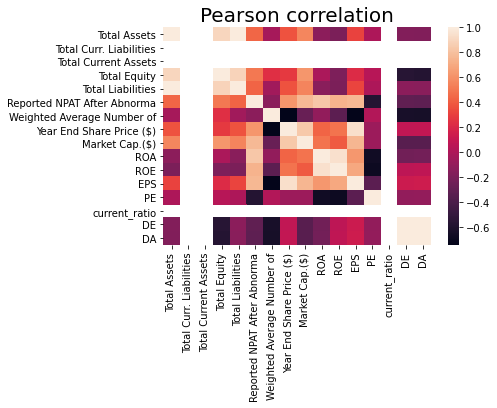

In [127]:
# heatmap
sns.heatmap(banks.corr())
plt.title("Pearson correlation", size=20)

In [960]:
# financial1.loc[financial1.index == 'ASX']

Text(0, 0.5, 'ROE')

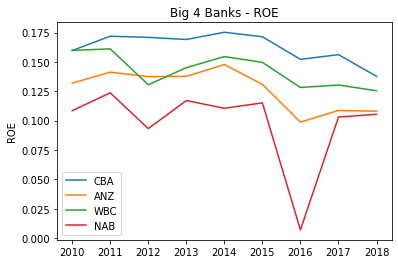

In [128]:
plt.plot(banks['ROE'].loc[banks['ASX Code']=='CBA'], label="CBA")
plt.plot(banks['ROE'].loc[banks['ASX Code']=='ANZ'], label="ANZ")
plt.plot(banks['ROE'].loc[banks['ASX Code']=='WBC'], label="WBC")
plt.plot(banks['ROE'].loc[banks['ASX Code']=='NAB'], label="NAB")
plt.legend(loc="lower left")
plt.title("Big 4 Banks - ROE")
plt.ylabel("ROE")

Text(0, 0.5, 'ROE')

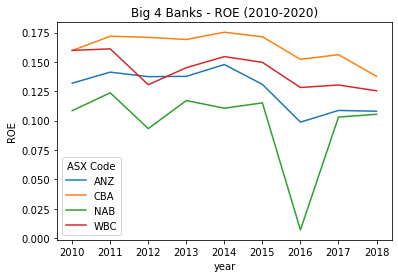

In [129]:
sns.lineplot(x = banks.index, y=banks['ROE'], hue=banks['ASX Code'])
plt.title("Big 4 Banks - ROE (2010-2020)")
plt.ylabel("ROE")

Text(0.5, 1.0, 'Big 4 banks - ROE (2010-2020)')

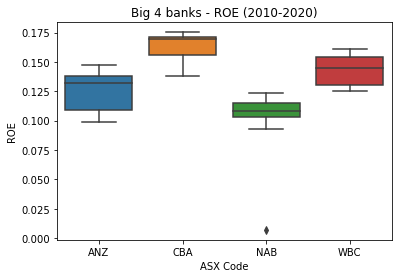

In [130]:
sns.boxplot(x=banks['ASX Code'], y=banks['ROE'])
plt.title("Big 4 banks - ROE (2010-2020)")

Text(0, 0.5, 'Yearly Share Price')

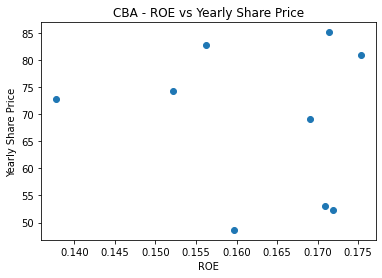

In [131]:
plt.scatter(x=banks['ROE'].loc[banks['ASX Code']=='CBA'], y=banks['Year End Share Price ($)'].loc[banks['ASX Code']=='CBA'])
plt.title("CBA - ROE vs Yearly Share Price")
plt.xlabel("ROE")
plt.ylabel("Yearly Share Price")

Text(0.5, 0, 'ROE')

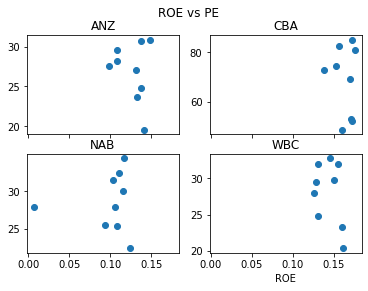

In [132]:
fig, axs = plt.subplots(2,2, sharex=True)

fig.suptitle("ROE vs PE")
axs[0,0].scatter(x=banks['ROE'].loc[banks['ASX Code']=='ANZ'], y=banks['Year End Share Price ($)'].loc[banks['ASX Code']=='ANZ'])
axs[0,0].set_title("ANZ")
axs[0,1].scatter(x=banks['ROE'].loc[banks['ASX Code']=='CBA'], y=banks['Year End Share Price ($)'].loc[banks['ASX Code']=='CBA'])
axs[0,1].set_title("CBA")
axs[1,0].scatter(x=banks['ROE'].loc[banks['ASX Code']=='NAB'], y=banks['Year End Share Price ($)'].loc[banks['ASX Code']=='NAB'])
axs[1,0].set_title("NAB")
axs[1,1].scatter(x=banks['ROE'].loc[banks['ASX Code']=='WBC'], y=banks['Year End Share Price ($)'].loc[banks['ASX Code']=='WBC'])
axs[1,1].set_title("WBC")

plt.xlabel("ROE")


<AxesSubplot:xlabel='ROE', ylabel='Year End Share Price ($)'>

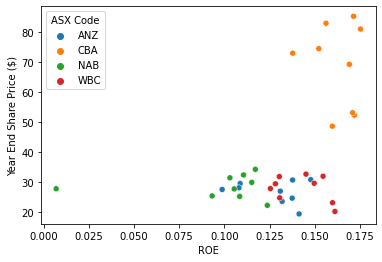

In [133]:
sns.scatterplot(data=banks, x='ROE', y='Year End Share Price ($)',hue='ASX Code')

In [160]:
# only going to include company greater than the median market cap
big_firms = financial1.loc[financial1['Market Cap.($)'] > financial1['Market Cap.($)'].median()]
# those firms that made positive ROE
positive_firms = big_firms.loc[big_firms['ROE']>0]

(array([1.000e+00, 0.000e+00, 4.000e+00, 6.517e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-290.05887 , -210.97374 , -131.88861 ,  -52.803482,   26.281647,
         105.366776,  184.4519  ,  263.53705 ,  342.62216 ,  421.70728 ,
         500.79242 ], dtype=float32),
 <BarContainer object of 10 artists>)

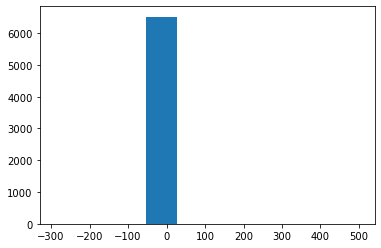

In [163]:
plt.hist(big_firms['ROE'])

In [ ]:
## Power transformation

In [201]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew

In [206]:
power = PowerTransformer()
quant = QuantileTransformer(output_distribution='normal')

In [207]:
roe_power = power.fit_transform(positive_firms[['ROE']])
roe_quant = quant.fit_transform(positive_firms[['ROE']])

(array([256., 379., 543., 593., 601., 527., 405., 246., 152.,  79.]),
 array([-1.9175788 , -1.47093   , -1.0242811 , -0.57763225, -0.13098343,
         0.31566542,  0.76231426,  1.2089632 ,  1.655612  ,  2.1022608 ,
         2.5489097 ], dtype=float32),
 <BarContainer object of 10 artists>)

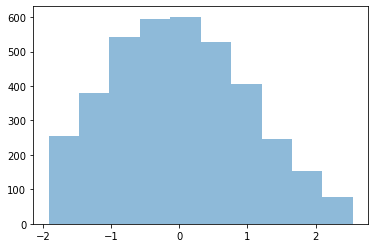

In [176]:
plt.hist(roe_power, alpha=0.5)

(array([1.000e+00, 3.000e+00, 6.700e+01, 4.930e+02, 1.326e+03, 1.326e+03,
        4.940e+02, 7.000e+01, 0.000e+00, 1.000e+00]),
 array([-5.1993375, -4.15947  , -3.1196024, -2.079735 , -1.0398675,
         0.       ,  1.0398675,  2.079735 ,  3.1196024,  4.15947  ,
         5.1993375], dtype=float32),
 <BarContainer object of 10 artists>)

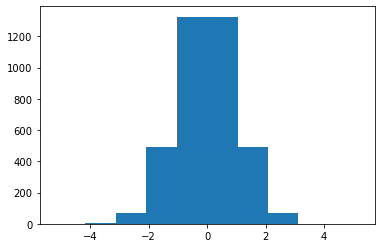

In [208]:
plt.hist(roe_quant)

(array([3.698e+03, 6.000e+01, 1.200e+01, 6.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e-02, 4.03090e+01, 8.06080e+01, 1.20907e+02, 1.61206e+02,
        2.01505e+02, 2.41804e+02, 2.82103e+02, 3.22402e+02, 3.62701e+02,
        4.03000e+02], dtype=float32),
 <BarContainer object of 10 artists>)

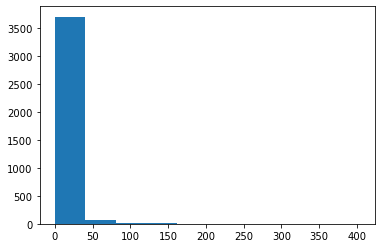

In [178]:
plt.hist(positive_firms['Year End Share Price ($)'])

In [181]:
financial1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 13047 entries, 2010.0 to 2018.0
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ASX Code                     13047 non-null  object 
 1   Total Assets                 13047 non-null  float32
 2   Total Curr. Liabilities      12868 non-null  float32
 3   Total Current Assets         12940 non-null  float32
 4   Total Equity                 13047 non-null  float32
 5   Total Liabilities            12976 non-null  float32
 6   Reported NPAT After Abnorma  13047 non-null  float32
 7   Weighted Average Number of   12498 non-null  float32
 8   Year End Share Price ($)     11905 non-null  float32
 9   Market Cap.($)               13047 non-null  float32
 10  Company Name                 13047 non-null  object 
 11  Status                       13047 non-null  object 
 12  GICS Sector                  13047 non-null  object 
 13  GICS Ind

In [196]:
financial1['ROE'].describe()

count    13047.000000
mean        -0.332292
std         52.573704
min      -1114.300049
25%         -0.413692
50%         -0.075630
75%          0.068835
max       5649.981934
Name: ROE, dtype: float64

In [197]:
a = power.fit_transform(financial1[['ROE']])

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


(array([2.0000e+00, 1.3041e+04, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1114.3    ,  -437.87186,   238.55635,   914.98456,  1591.4127 ,
         2267.8408 ,  2944.269  ,  3620.6973 ,  4297.1255 ,  4973.5537 ,
         5649.982  ], dtype=float32),
 <BarContainer object of 10 artists>)

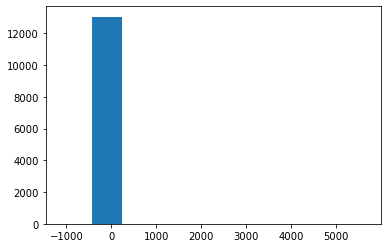

In [209]:
plt.hist(financial1['ROE'])

In [203]:
print(skew(financial1['ROE']))
print(skew(a))

95.1653823852539
[-1.2525245]


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 1.3034e+04,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-68.226585 , -54.342876 , -40.459167 , -26.575459 , -12.69175  ,
          1.1919594,  15.075668 ,  28.959377 ,  42.843086 ,  56.726795 ,
         70.610504 ], dtype=float32),
 <BarContainer object of 10 artists>)

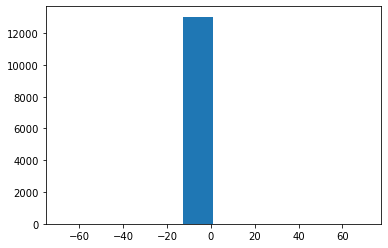

In [205]:
plt.hist(a)

In [105]:
financial.head()

Item,CA Cash,CA Inventories,CL Short-Term Debt,NCL Long-Term Debt,Total Assets,Total Curr. Liabilities,Total Current Assets,Total Equity,Total Liabilities,year,...,Operating Expenses,Reported NPAT After Abnorma,Shares Outstanding at Perio,Total Revenue Excluding Int,Weighted Average Number of,Market Cap.($),Net Financing Cash Flow,Net Investing Cash Flow,Net Operating Cash Flow,Year End Share Price ($)
ASX Code,,,,,,,,,,,,,,,,,,,,,
14D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1AG,271919.0,282857.0,1046419.0,59535.0,8940993.0,3922626.0,2336530.0,4958832.0,3982161.0,2010.0,...,-12886912.0,317330.0,39697172.0,13271768.0,39741708.0,3453654.0,1206807.0,-3371176.0,-417821.0,0.09
1ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
